In [1]:
# librerías
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Entregas/Copia de full_df_gb_date.csv')

In [4]:
df.head()

,Unnamed: 0,id,item,category,department,store,store_code,region,date,year_week,month,year,units,sell_price,revenue
0,0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2013-07-16,2013-29,July,2013,1.0,10.99,10.99
1,1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2013-07-17,2013-29,July,2013,3.0,10.99,32.97
2,2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2013-07-26,2013-30,July,2013,3.0,10.99,32.97
3,3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2013-07-27,2013-30,July,2013,1.0,10.99,10.99
4,4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2013-07-29,2013-31,July,2013,2.0,10.99,21.98


In [5]:
df.shape

(18550276, 15)

In [6]:
df.isnull().sum()

Unnamed: 0    0
id            0
item          0
category      0
department    0
store         0
store_code    0
region        0
date          0
year_week     0
month         0
year          0
units         0
sell_price    0
revenue       0
dtype: int64

In [7]:
columnas = df.columns
print(columnas)

Index(['Unnamed: 0', 'id', 'item', 'category', 'department', 'store',
       'store_code', 'region', 'date', 'year_week', 'month', 'year', 'units',
       'sell_price', 'revenue'],
      dtype='object')


In [8]:
df.sample(n=10, axis=1)

,revenue,year,category,region,store,date,units,month,store_code,id
0,10.99,2013,ACCESORIES,Boston,South_End,2013-07-16,1.0,July,BOS_1,ACCESORIES_1_001_BOS_1
1,32.97,2013,ACCESORIES,Boston,South_End,2013-07-17,3.0,July,BOS_1,ACCESORIES_1_001_BOS_1
2,32.97,2013,ACCESORIES,Boston,South_End,2013-07-26,3.0,July,BOS_1,ACCESORIES_1_001_BOS_1
3,10.99,2013,ACCESORIES,Boston,South_End,2013-07-27,1.0,July,BOS_1,ACCESORIES_1_001_BOS_1
4,21.98,2013,ACCESORIES,Boston,South_End,2013-07-29,2.0,July,BOS_1,ACCESORIES_1_001_BOS_1
...,...,...,...,...,...,...,...,...,...,...
18550271,1.20,2016,SUPERMARKET,Philadelphia,Queen_Village,2016-04-03,1.0,April,PHI_3,SUPERMARKET_3_827_PHI_3
18550272,2.40,2016,SUPERMARKET,Philadelphia,Queen_Village,2016-04-04,2.0,April,PHI_3,SUPERMARKET_3_827_PHI_3
18550273,3.60,2016,SUPERMARKET,Philadelphia,Queen_Village,2016-04-05,3.0,April,PHI_3,SUPERMARKET_3_827_PHI_3
18550274,2.40,2016,SUPERMARKET,Philadelphia,Queen_Village,2016-04-06,2.0,April,PHI_3,SUPERMARKET_3_827_PHI_3


In [9]:
df['region'].value_counts()

New York        7884010
Boston          5411801
Philadelphia    5254465
Name: region, dtype: int64

In [10]:
df['category'].value_counts()

SUPERMARKET      10440299
HOME_&_GARDEN     5654304
ACCESORIES        2455673
Name: category, dtype: int64

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
#analisis de las tendencias de ventas a lo largo del tiempo, identificando cualquier patrón estacional o tendencia general.
ventas_x_fecha = df.groupby('date')['units'].sum().reset_index()

In [13]:
ventas_x_fecha

,date,units
0,2011-01-29,32631.0
1,2011-01-30,31749.0
2,2011-01-31,23783.0
3,2011-02-01,25412.0
4,2011-02-02,19146.0
...,...,...
1908,2016-04-20,35343.0
1909,2016-04-21,35033.0
1910,2016-04-22,40517.0
1911,2016-04-23,48962.0


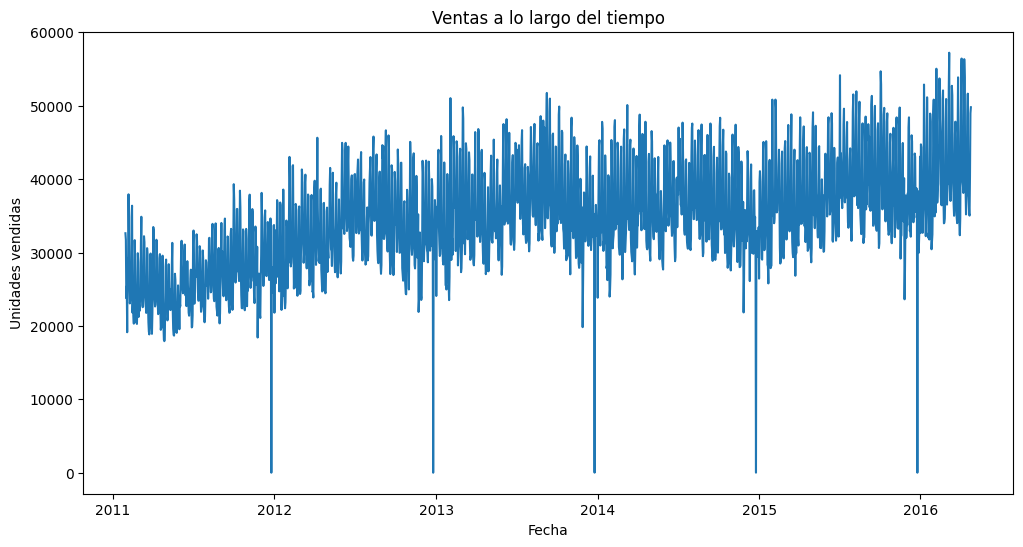

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='units', data=ventas_x_fecha)
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Unidades vendidas')
plt.show()

<Figure size 1200x800 with 0 Axes>

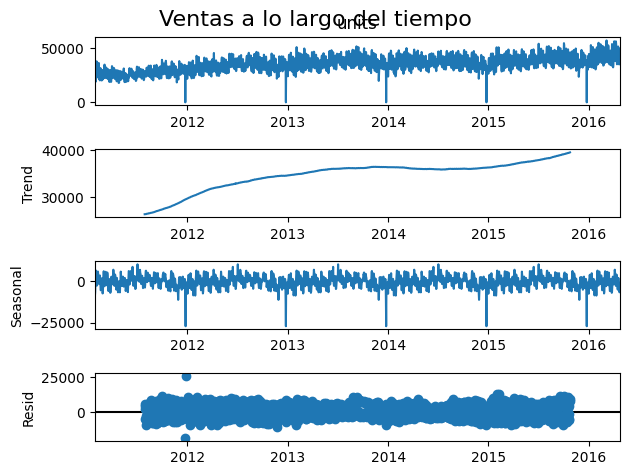

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

ventas_x_fecha.set_index('date', inplace=True)

decomp = seasonal_decompose(ventas_x_fecha['units'], model='additive', period=365)

plt.figure(figsize=(12, 8))
decomp.plot()
plt.suptitle('Ventas a lo largo del tiempo', fontsize=16)
plt.show()

In [16]:
#comparacion de ventas entre las ciudades para determinar si hay diferencias significativas.
ventas_x_ciudad = df.groupby(['region', 'date'])['units'].sum().reset_index()

<ipython-input-17-caa591f9eb50>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='units', data=ventas_x_ciudad, ci=None)


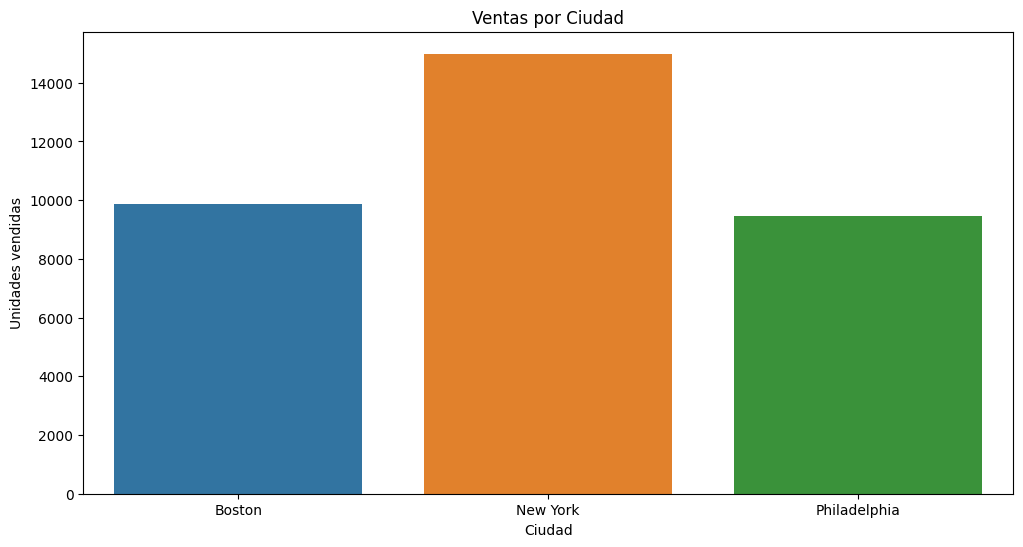

In [17]:
#comparar ventas entre ciudades
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='units', data=ventas_x_ciudad, ci=None)
plt.title('Ventas por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Unidades vendidas')
plt.show()

Existen diferencias significativas en las ventas entre las ciudades.


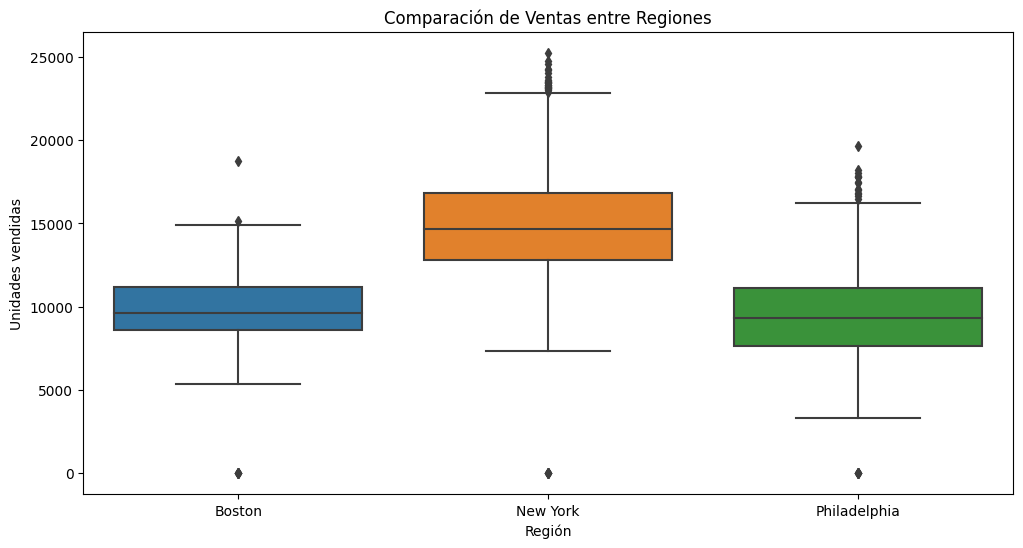

In [18]:
from scipy.stats import f_oneway

#agrupo las ventas por ciudad y calculo el total de ventas por ciudad
ventas_totales_ciudad = df.groupby('region')['units'].sum()

#test ANOVA
resultado_anova = f_oneway(*[ventas_x_ciudad[ventas_x_ciudad['region'] == ciudad]['units'] for ciudad in df['region'].unique()])

#ver si hay diferencias significativas
p_valor = resultado_anova.pvalue
nivel_significancia = 0.05

if p_valor < nivel_significancia:
    print("Existen diferencias significativas en las ventas entre las ciudades.")

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='region', y='units', data=ventas_x_ciudad)
    plt.title('Comparación de Ventas entre Regiones')
    plt.xlabel('Región')
    plt.ylabel('Unidades vendidas')
    plt.show()

else:
    print("No se encontraron diferencias significativas en las ventas entre las ciudades.")

<ipython-input-19-2c0bffc1c8c3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='region', y='units', data=ventas_x_ciudad, ci='sd')  #barra de error representa la desviación estándar


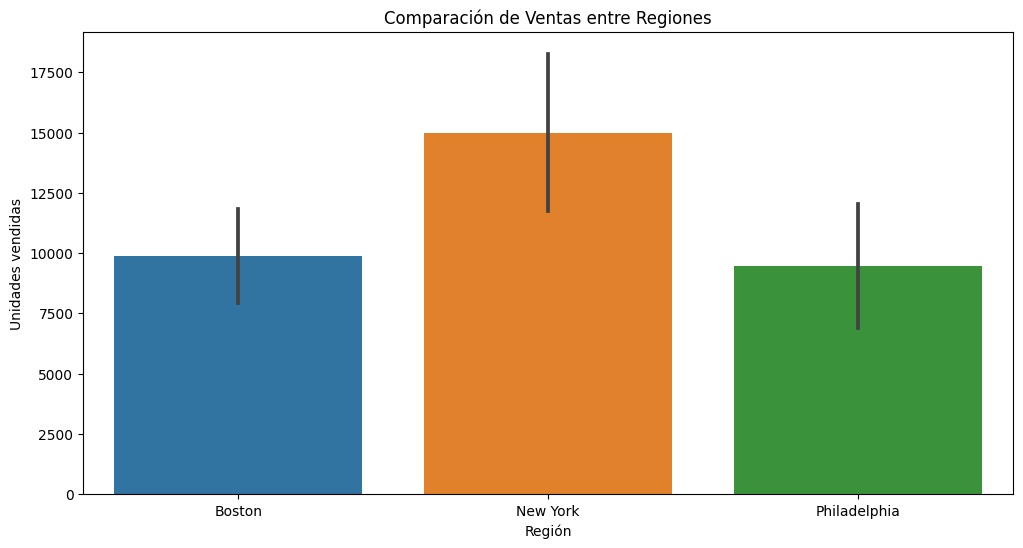

In [19]:
#otros graficos
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='units', data=ventas_x_ciudad, ci='sd')  #barra de error representa la desviación estándar
plt.title('Comparación de Ventas entre Regiones')
plt.xlabel('Región')
plt.ylabel('Unidades vendidas')
plt.show()

<ipython-input-20-4ebe2aa6f84c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='units', data=ventas_x_ciudad, estimator='mean', ci=None, color='red')  #puntos representan ventas individuales, barra roja el promedio


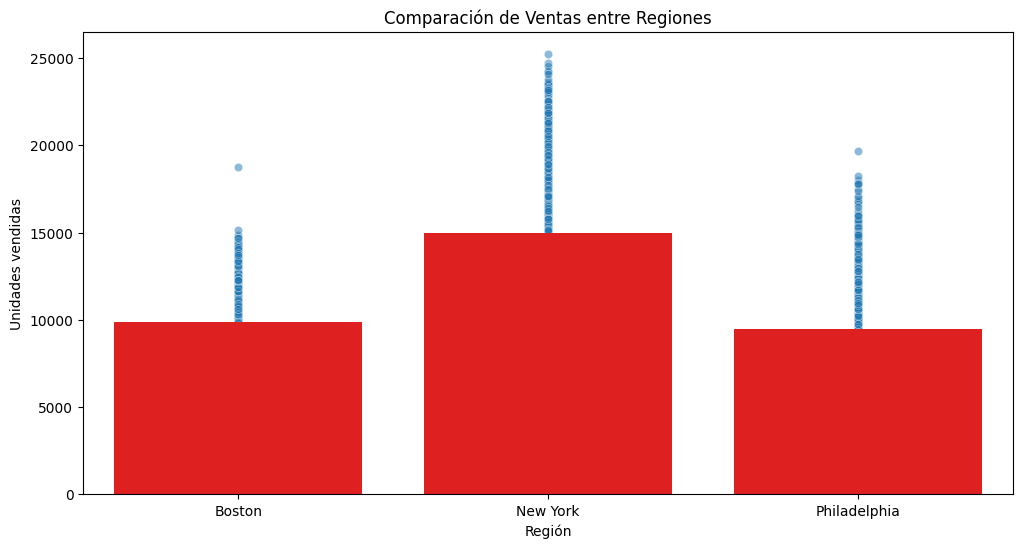

In [20]:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='region', y='units', data=ventas_x_ciudad, alpha=0.5)
    sns.barplot(x='region', y='units', data=ventas_x_ciudad, estimator='mean', ci=None, color='red')  #puntos representan ventas individuales, barra roja el promedio
    plt.title('Comparación de Ventas entre Regiones')
    plt.xlabel('Región')
    plt.ylabel('Unidades vendidas')
    plt.show()

In [21]:
#examinar la popularidad de los productos e identificar los más vendidos en cada ciudad.
ventas_ciudad_producto = df.groupby(['region', 'item'])['units'].sum().reset_index()

In [22]:
#productos más vendidos en cada ciudad
prod_mas_vendidos = ventas_ciudad_producto.groupby('region').apply(lambda x: x.nlargest(5, 'units')).reset_index(drop=True)

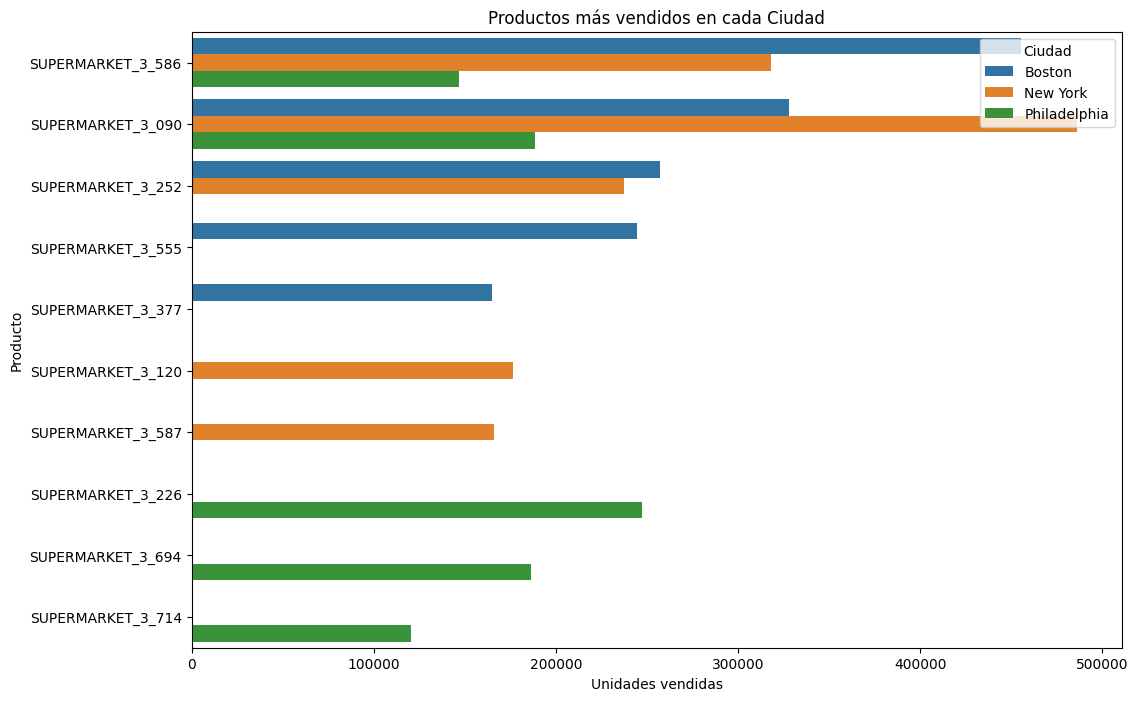

In [23]:
#grafico
plt.figure(figsize=(12, 8))
sns.barplot(x='units', y='item', hue='region', data=prod_mas_vendidos)
plt.title('Productos más vendidos en cada Ciudad')
plt.xlabel('Unidades vendidas')
plt.ylabel('Producto')
plt.legend(title='Ciudad', loc='upper right')
plt.show()

In [24]:
#analisis de las variaciones de precios entre tiendas y ciudades, determinar si hay alguna relación entre los precios y las ventas.
datos_ciudad_tienda = df.groupby(['region', 'store']).agg({'sell_price': 'mean', 'units': 'sum'}).reset_index()

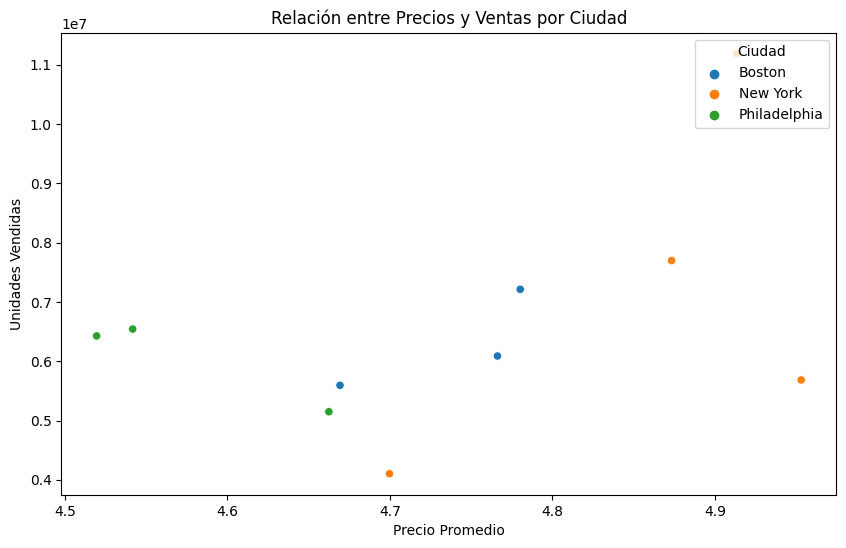

In [25]:
#grafico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sell_price', y='units', hue='region', data=datos_ciudad_tienda)
plt.title('Relación entre Precios y Ventas por Ciudad')
plt.xlabel('Precio Promedio')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Ciudad', loc='upper right')
plt.show()